<a href="https://colab.research.google.com/github/szyxxx/MachineLearning-TelkomUniversity/blob/main/Clustering/SKELEARN/AXELDAVID_1103210017_TK4504_SKLEARN_CLUSTERING_MALL_CUSTOMERS_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Axel David<br>
1103210017<br>
SKLearn Clustering<br>


# Import Library

In [66]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import matplotlib.pyplot as plt
from google.colab import drive
import zipfile

# Import Dataset

In [67]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
! chmod 600 /content/drive/MyDrive/ColabNotebooks/kaggle_conf/kaggle.json

In [69]:
! KAGGLE_CONFIG_DIR=/content/drive/MyDrive/ColabNotebooks/kaggle_conf/ kaggle datasets download -d shwetabh123/mall-customers

mall-customers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [70]:
zip_file = zipfile.ZipFile('/content/drive/MyDrive/ColabNotebooks/dataset/mall-customers.zip','r')
zip_file.extractall('/content/drive/MyDrive/ColabNotebooks/dataset/')

# Informasi Dataset

In [71]:
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset/Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [72]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [74]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)
df = pd.get_dummies(df, columns=['Gender'])
df['Gender'] = df['Gender_Male'].astype(int)

In [75]:
df.dtypes

CustomerID                int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Gender_Female              bool
Gender_Male                bool
Gender                    int64
dtype: object

<h2>1. DBSCAN</h2>

In [76]:
scaler = StandardScaler()
X = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']])

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 200


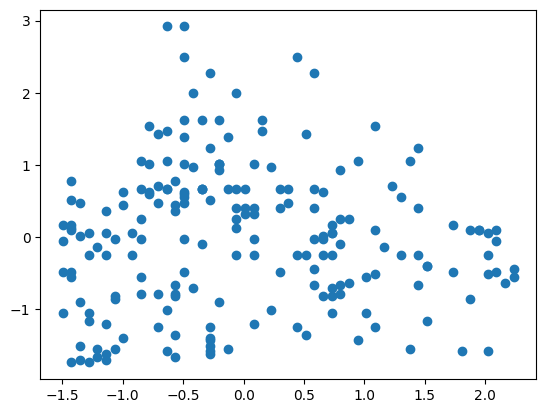

In [78]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

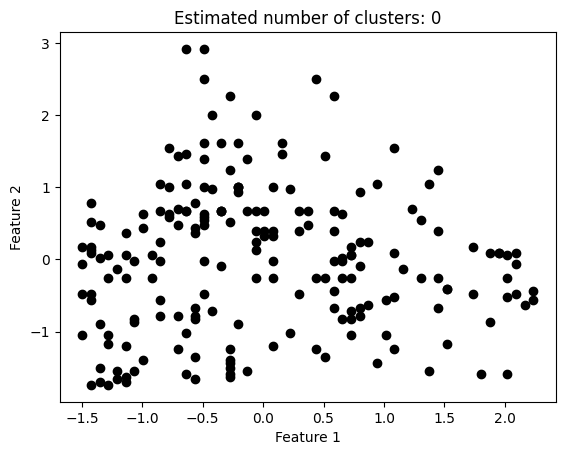

In [79]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14 if k != -1 else 6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()